# Project Data

Below I've pulled FX rates for a basket of currencies with respect to the US dollar. Lower I've written a helper function that, given a single time series and two frequencies will then provide a buy signal (+1) or sell signal (-1) when the faster moving average crosses the slower moving average moving positively or negatively respectively. I plan to apply this function across the basket of currencies for a number of different moving average frequencies and use a learnin algorithm to determine to strength/predictive power of the trading signals and decide which to implement.

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [10]:
import os
os.getcwd()

'C:\\Users\\Ben\\My Documents\\DAT-NYC-30\\project'

In [ ]:
# Quandl API in case I come back to this approach
key = '8kx5ntFkPhpwX7Nhs6fN'

In [293]:
# Use default Pandas Yahoo! Finance interface
import pandas.io.data as web
all_data = {}
currencies = ['JPY=X','RUB=X','EUR=X','CAD=X','BRL=X',
              'GBP=X','AUD=X','NZD=X','MXN=X']

for ticker in currencies:
    all_data[ticker] = web.get_data_yahoo(ticker, '6/1/2006', '2/1/2016')
    
rates = pd.DataFrame({tic: data['Adj Close'] for tic, data in all_data.items()})

In [294]:
rates.head()

,AUD=X,BRL=X,CAD=X,EUR=X,GBP=X,JPY=X,MXN=X,NZD=X,RUB=X
Date,,,,,,,,,
2006-06-01,1.3371,2.2672,1.1025,0.78058,0.53579,112.480,11.221,1.5916,27.09
2006-06-02,1.3314,2.2823,1.1011,0.77411,0.53129,111.730,11.301,1.5853,26.76
2006-06-05,1.3364,2.2823,1.1054,0.77513,0.53436,112.340,11.325,1.5808,26.71
2006-06-06,1.3488,2.2670,1.1132,0.77991,0.53737,113.215,11.275,1.5924,26.81
2006-06-07,1.3470,2.2565,1.1120,0.78113,0.53844,113.430,11.325,1.5860,26.85


I found that Christmas day 2006 has shit data. Remove this day.

In [105]:
rates.shape

(2516, 9)

In [362]:
# Having troublt removing this! wtf
rates = rates.drop(['2006-12-25'])

In [118]:
rates.shape

(2516, 9)

In [68]:
rates.describe()

,AUD=X,BRL=X,CAD=X,EUR=X,GBP=X,JPY=X,MXN=X,NZD=X,RUB=X
count,2513.000000,2491.000000,2513.000000,2498.000000,2511.000000,2498.000000,2514.000000,2515.000000,2493.000000
mean,1.143865,2.132181,1.085132,0.758459,0.606179,99.703765,12.790008,1.361193,33.823658
std,0.157169,0.529254,0.101031,0.065491,0.058184,14.934695,1.593555,0.164573,11.333317
min,0.218820,1.533700,0.918700,0.625470,0.474340,75.740000,9.866500,1.133300,0.716200
25%,1.015300,1.765000,1.010200,0.721140,0.585840,85.912750,11.624750,1.235750,27.369000
50%,1.110400,2.023000,1.052700,0.750495,0.622740,99.133000,12.870350,1.318400,30.681000
75%,1.264400,2.256250,1.131600,0.782597,0.645360,115.377500,13.339975,1.443200,33.130600
max,1.652000,4.175100,1.457800,0.954050,0.725530,125.629000,18.709000,2.029200,82.900000


In [74]:
# Ask if there's a better way to do this: bad programming
cum_rates = rates.copy()
for col in range(rates.shape[1]):
    for row in range(rates.shape[0]):
        if row == 0:
            cum_rates.ix[row,col]=1
        else:
            cum_rates.ix[row,col] = cum_rates.ix[row-1,col]*(
                                     rates.iloc[row,col]/rates.iloc[row-1,col])

In [75]:
cum_rates.head()

,AUD=X,BRL=X,CAD=X,EUR=X,GBP=X,JPY=X,MXN=X,NZD=X,RUB=X
Date,,,,,,,,,
2006-06-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2006-06-02,0.995737,1.006660,0.998730,0.991711,0.991601,0.993332,1.007129,0.996042,0.987818
2006-06-05,0.999476,1.006660,1.002630,0.993018,0.997331,0.998755,1.009268,0.993214,0.985973
2006-06-06,1.008750,0.999912,1.009705,0.999142,1.002949,1.006534,1.004812,1.000503,0.989664
2006-06-07,1.007404,0.995281,1.008617,1.000705,1.004946,1.008446,1.009268,0.996482,0.991141


Load Bloomberg currency data

Note: trying to do this with Yahoo! Finance data above

In [49]:
levels = pd.read_excel('FX_data.xlsx', sheetname=0)
#levels.head()

In [63]:
#levels.iloc[98:105,]

In [57]:
cum_levels = pd.read_excel('FX_data.xlsx', sheetname=1)
#cum_levels.head()

In [76]:
#cum_levels.iloc[98:103,]

In [20]:
import seaborn as sns
sns.set(context="paper", font="monospace")

corrmat = levels.corr()
f, ax = plt.subplots(figsize=(12,9))

# draw heatmap
sns.heatmap(corrmat, vmax=0.8, square=True)

AttributeError: 'module' object has no attribute 'subplots'

In [82]:
t = range(0,cum_rates.shape[0])

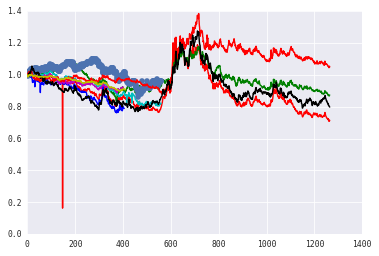

In [132]:
plt.plot(figsize=[12,10])
plt.plot(t,cum_rates.ix[:,0],'r',t,cum_rates.ix[:,1],'b',t,cum_rates.ix[:,2],'g',
         t,cum_rates.ix[:,3],'c',t,cum_rates.ix[:,4],'m',t,cum_rates.ix[:,5],'o',
         t,cum_rates.ix[:,6],'r',t,cum_rates.ix[:,7],'k',t,cum_rates.ix[:,8],'y')
plt.show()

In [130]:
cum_rates.ix[130:150,0]

Date
2006-11-30    0.948396
2006-12-01    0.944806
2006-12-04    0.948097
2006-12-05    0.950639
2006-12-06    0.953182
2006-12-07    0.948396
2006-12-08    0.950565
2006-12-11    0.951986
2006-12-12    0.949592
2006-12-13    0.950789
2006-12-14    0.954304
2006-12-15    0.954902
2006-12-18    0.957146
2006-12-19    0.952509
2006-12-20    0.951612
2006-12-21    0.953481
2006-12-22    0.954528
2006-12-25    0.163653
2006-12-26    0.955650
2006-12-27    0.952584
Name: AUD=X, dtype: float64

In [131]:
rates.ix[130:150,0]

Date
2006-11-30    1.26810
2006-12-01    1.26330
2006-12-04    1.26770
2006-12-05    1.27110
2006-12-06    1.27450
2006-12-07    1.26810
2006-12-08    1.27100
2006-12-11    1.27290
2006-12-12    1.26970
2006-12-13    1.27130
2006-12-14    1.27600
2006-12-15    1.27680
2006-12-18    1.27980
2006-12-19    1.27360
2006-12-20    1.27240
2006-12-21    1.27490
2006-12-22    1.27630
2006-12-25    0.21882
2006-12-26    1.27780
2006-12-27    1.27370
Name: AUD=X, dtype: float64

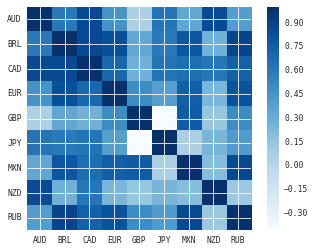

In [204]:
corrmat = rates.corr()
# reference http://stackoverflow.com/questions/21071128/matplotlib-plot-numpy-matrix-as-0-index
labels = ['AUD', 'BRL','CAD','EUR','GBP','JPY','MXN','NZD','RUB']
column_labels, row_labels = labels, labels

fig, ax = plt.subplots()
plt.imshow(corrmat, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

# Set tick marks in middle of cells
ax.set_xticks(np.arange(corrmat.shape[0]), minor=False)
ax.set_yticks(np.arange(corrmat.shape[1]), minor=False)

ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
plt.show()

<function matplotlib.pyplot.show>

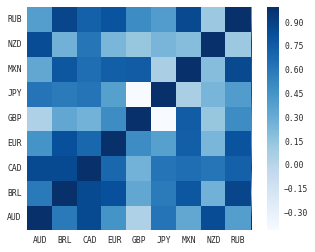

In [198]:
# Correlation heat map
labels = ['AUD', 'BRL','CAD','EUR','GBP','JPY','MXN','NZD','RUB']
column_labels, row_labels = labels, labels
data = corrmat
fig, ax = plt.subplots()
heatmap = ax.pcolor(data, cmap=plt.cm.Blues)

plt.imshow(data, cmap=plt.cm.Blues,
          extent=(0,np.shape(corrmat)[0],0,np.shape(corrmat)[1]))
plt.colorbar()

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_yticks(np.arange(data.shape[1])+0.5, minor=False)

# want a more natural, table-like display
#ax.invert_yaxis()
#ax.xaxis.tick_top()

ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
plt.show

In [446]:
def cross_over(data, freq1, freq2):
    # function to create a crossover trading signal with 
    # values -1 = sell, 0 = hold, 1 = buy
    # INPUTS: data = vector, freq1 and freq2 should be integers
    
    #data = pd.Series(data)
    # Show error message if freq1 = freq2
    if freq1 == freq2:
        print "Error: freq1 and freq2 parameters cannot be equal. Please use different values." 
        return None
      
    slow = max(freq1, freq2)
    fast = min(freq1, freq2)

    # Create vectors for the respective moving averages 
    # Can I do this as fast_pst = fast_fwd = slow_fwd =[] or will this create dependency???
    fast_pst = ([0]*slow)
    fast_fwd = ([0]*slow)
    slow_fwd = ([0]*slow)

    # Create three vectors to test equality in signal creation
    # NOTE: previously had nested if loop asking 'if date > slow:' but added condition into the range
    for date in range(slow, len(data)):
        fast_fwd.append(data.iloc[date-fast:date].mean())
        fast_pst.append(fast_fwd[-2])
        slow_fwd.append(data.iloc[date-slow:date].mean())

    # Use inequality to create binary signal vector
    buy_signal = ((pd.Series(fast_fwd)>pd.Series(slow_fwd)) & (pd.Series(slow_fwd)>pd.Series(fast_pst))).map({False: 0, True: 1})
    sell_signal = ((pd.Series(fast_fwd)<pd.Series(slow_fwd)) & (pd.Series(slow_fwd)<pd.Series(fast_pst))).map({False: 0, True: -1})

    signal = pd.Series(zip(buy_signal, sell_signal)).apply(lambda x: sum(x))
    return signal    

In [450]:
signal = cross_over(rates.iloc[:,0],10,50)
signal[:100]

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
     ..
70    0
71    0
72    0
73    0
74    0
75    0
76    0
77    1
78    0
79    0
80    0
81    0
82    0
83    0
84    0
85    0
86    0
87    0
88    0
89    0
90    0
91    0
92    0
93    0
94    0
95    0
96    0
97    0
98    0
99    0
dtype: int64

In [441]:
data = rates.iloc[:100,0]
freq1 = 5
freq2 = 20

if freq1 == freq2:
    print "Error: freq1 and freq2 parameters cannot be equal. Please use different values." 
#    return None

slow = max(freq1,freq2)
fast = min(freq1,freq2)

# Create empty lists for the respective moving averages - does this create dependency?
fast_pst = ([0]*slow)
fast_fwd = ([0]*slow)
slow_fwd = ([0]*slow)

print slow, fast

for date in range(slow, len(data)):
    fast_fwd.append(data.iloc[date-fast:date].mean())
    fast_pst.append(fast_fwd[-2])
    slow_fwd.append(data.iloc[date-slow:date].mean())
    
buy_signal = ((pd.Series(fast_fwd)>pd.Series(slow_fwd)) & (pd.Series(slow_fwd)>pd.Series(fast_pst))).map({False: 0, True: 1})
sell_signal = ((pd.Series(fast_fwd)<pd.Series(slow_fwd)) & (pd.Series(slow_fwd)<pd.Series(fast_pst))).map({False: 0, True: -1})

signal = pd.Series(zip(buy_signal, sell_signal)).apply(lambda x: sum(x))
print signal
    

20 5
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    1
21    0
22    0
23    0
24   -1
25    0
26    0
27    0
28    0
29    0
     ..
70    0
71    0
72    0
73    1
74    0
75    0
76    0
77    0
78    0
79    0
80    0
81    0
82    0
83    0
84    0
85    0
86    0
87    0
88    0
89    0
90    0
91    0
92    0
93    0
94    0
95    0
96    0
97    0
98    0
99   -1
dtype: int64


In [437]:
(fast_fwd) > (slow_fwd) #& (pd.Series(slow_fwd)>pd.Series(fast_pst))).map({False: 0, True: 1})
#print len(slow_fwd)
#print len(slow_fwd)

True

In [438]:
fast_fwd

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1.36634,
 1.3642,
 1.3602400000000001,
 1.3566200000000002,
 1.3522000000000003,
 1.34746,
 1.34518,
 1.3418800000000002,
 1.3402200000000002,
 1.3370600000000001,
 1.33316,
 1.3303600000000002,
 1.32948,
 1.3293,
 1.33132,
 1.3321,
 1.33316,
 1.33326,
 1.33124,
 1.3289199999999999,
 1.32534,
 1.32104,
 1.3167199999999997,
 1.31246,
 1.3084799999999999,
 1.30718,
 1.30776,
 1.3081399999999999,
 1.3089799999999998,
 1.31142,
 1.31098,
 1.3084799999999999,
 1.3080399999999999,
 1.30922,
 1.3067,
 1.3057,
 1.3079999999999998,
 1.3101800000000001,
 1.3093400000000002,
 1.3102800000000001,
 1.3125,
 1.31266,
 1.31356,
 1.3145399999999998,
 1.3140800000000001,
 1.3134599999999998,
 1.31278,
 1.30956,
 1.3057,
 1.3035400000000001,
 1.3024799999999999,
 1.3041399999999999,
 1.30866,
 1.31568,
 1.32202,
 1.32684,
 1.3283,
 1.32898,
 1.32722,
 1.3272,
 1.32742,
 1.32638,
 1.32652,
 1.32728,
 1.32742,
 1.327980000000

In [419]:
pd.Series(fast_fwd) > pd.Series(slow_fwd)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20     True
21     True
22     True
23     True
24    False
25    False
26    False
27    False
28    False
29    False
      ...  
70    False
71    False
72    False
73     True
74     True
75     True
76     True
77     True
78     True
79     True
80     True
81     True
82     True
83     True
84     True
85     True
86     True
87     True
88     True
89     True
90     True
91     True
92     True
93     True
94     True
95     True
96     True
97     True
98     True
99    False
dtype: bool

In [375]:
data.iloc[date-fast:date]

Date
2006-06-01    1.3371
2006-06-02    1.3314
2006-06-05    1.3364
2006-06-06    1.3488
2006-06-07    1.3470
2006-06-08    1.3466
2006-06-09    1.3324
2006-06-12    1.3470
2006-06-13    1.3557
2006-06-14    1.3554
Name: AUD=X, dtype: float64

In [291]:
## Example for creting the signal
fast_fwd = pd.Series([1,3,5,6,5,4])
fast_pst = pd.Series([0,1,3,5,6,5])
slow =     pd.Series([1,3,4,4,4,4.5])

# Use inequality to create binary signal vector
buy_signal = pd.Series((fast_fwd>slow) & (slow>fast_pst)).map({False: 0, True: 1})
sell_signal = pd.Series((fast_fwd<slow) & (slow<fast_pst)).map({False: 0, True: -1})

signal = pd.Series(zip(buy_signal, sell_signal)).apply(lambda x: sum(x))

print signal

0    0
1    0
2    1
3    0
4    0
5   -1
dtype: int64


In [285]:
fast_fwd = pd.Series([1,3,5,6,5,4])
slow =     pd.Series([1,3,4,4,4,4.5])
fast_pst = pd.Series([0,1,3,5,6,5])

In [284]:
signal

0    False
1    False
2     True
3    False
4    False
5    False
dtype: bool

In [222]:
data

,AUD=X,BRL=X,CAD=X,EUR=X,GBP=X,JPY=X,MXN=X,NZD=X,RUB=X
AUD=X,1.000000,0.599684,0.859534,0.456079,0.051430,0.630243,0.340065,0.848330,0.399152
BRL=X,0.599684,1.000000,0.859098,0.826392,0.335809,0.593849,0.787613,0.276394,0.888988
CAD=X,0.859534,0.859098,1.000000,0.702546,0.269251,0.627139,0.659784,0.625787,0.735863
EUR=X,0.456079,0.826392,0.702546,1.000000,0.494575,0.384598,0.745468,0.245687,0.809361
GBP=X,0.051430,0.335809,0.269251,0.494575,1.000000,-0.407103,0.758858,0.147749,0.495122
JPY=X,0.630243,0.593849,0.627139,0.384598,-0.407103,1.000000,0.065789,0.250794,0.409340
MXN=X,0.340065,0.787613,0.659784,0.745468,0.758858,0.065789,1.000000,0.202828,0.867021
NZD=X,0.848330,0.276394,0.625787,0.245687,0.147749,0.250794,0.202828,1.000000,0.126750
RUB=X,0.399152,0.888988,0.735863,0.809361,0.495122,0.409340,0.867021,0.126750,1.000000
